In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

In [3]:
note = pd.read_csv('BankNoteAuthentication.csv')
note.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


    Context
    Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

    Attribute Information:
    variance of Wavelet Transformed image 
    skewness of Wavelet Transformed image 
    curtosis of Wavelet Transformed image
    entropy of image 
    class 
    
    
    Acknowledgements
    https://archive.ics.uci.edu/ml/datasets/banknote+authentication#

    Source:
    Owner of database: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe, volker.lohweg '@' hs-owl.de)
    Donor of database: Helene DÃ¶rksen (University of Applied Sciences, Ostwestfalen-Lippe, helene.doerksen '@' hs-owl.de)
    Date received: August, 2012

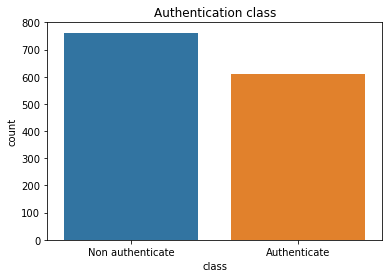

In [4]:
sns.countplot(x='class' ,data=note)
plt.xticks([0,1], ['Non authenticate', 'Authenticate'])
plt.title('Authentication class')
plt.show()

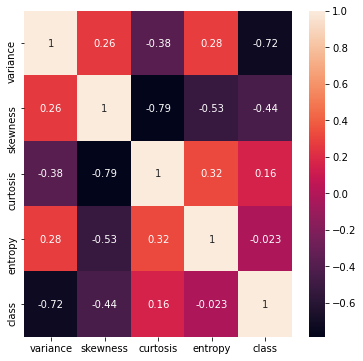

In [5]:
plt.subplots(figsize = (6,6))
_ = sns.heatmap(note.corr(), annot = True)
_ = plt.show()

In [6]:
# note.drop(['entropy'], axis = 1, inplace = True)
note.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


    Since entropy has lower correlation with our target, I removed it at first but data with entropy gave good predictions than without entropy.

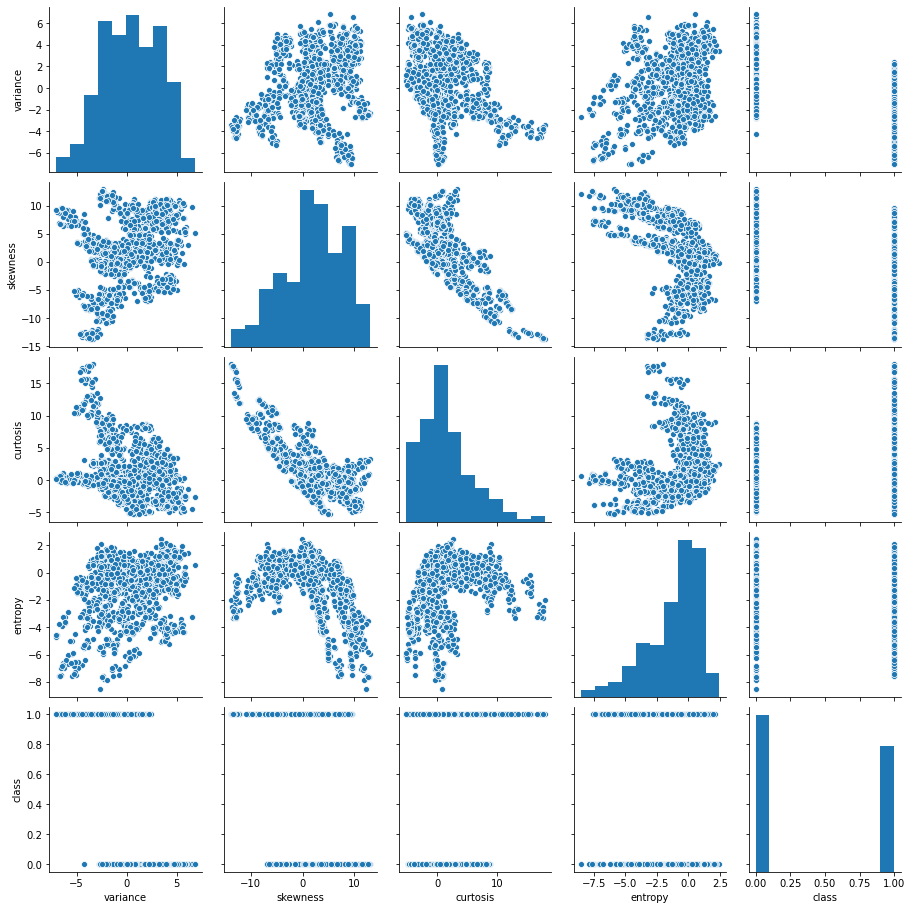

In [7]:
sns.pairplot(note)

In [8]:
note.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
note.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [10]:
features = note.iloc[:, :-1]
labels = note.iloc[:, -1]

# Logistic Regression

In [29]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 5)
log_cla = LogisticRegression() 
log_cla.fit(x_train, y_train)
print("Train Accuracy: ",log_cla.score(x_train, y_train))
print("\nTest Accuracy: ",log_cla.score(x_test, y_test))
print("\nTrain Confusion Matrix: \n", confusion_matrix(y_train, log_cla.predict(x_train)))
print("\nTest Confusion Matrix: \n", confusion_matrix(y_test, log_cla.predict(x_test)))

Train Accuracy:  0.9899726526891522

Test Accuracy:  0.9927272727272727

Train Confusion Matrix: 
 [[606   8]
 [  3 480]]

Test Confusion Matrix: 
 [[146   2]
 [  0 127]]


# Support Vector Classifiction

In [30]:
vect_cla = SVC(kernel = 'rbf', gamma = 0.1)
# vect_cla = SVC(kernel = 'poly', degree  = 1)
vect_cla.fit(x_train, y_train)
print("Train Accuracy: ",vect_cla.score(x_train, y_train))
print("\nTest Accuracy: ",vect_cla.score(x_test, y_test))
print("\nTrain Confusion Matrix: \n", confusion_matrix(y_train, vect_cla.predict(x_train)))
print("\nTest Confusion Matrix: \n", confusion_matrix(y_test, vect_cla.predict(x_test)))

Train Accuracy:  1.0

Test Accuracy:  1.0

Train Confusion Matrix: 
 [[614   0]
 [  0 483]]

Test Confusion Matrix: 
 [[148   0]
 [  0 127]]


# K nearest neighbor Classification

In [35]:
kn_cla = KNeighborsClassifier(n_neighbors=3)
kn_cla.fit(x_train, y_train)
print("Train Accuracy: ",kn_cla.score(x_train, y_train))
print("\nTest Accuracy: ",kn_cla.score(x_test, y_test))
print("\nTrain Confusion Matrix: \n", confusion_matrix(y_train, kn_cla.predict(x_train)))
print("\nTest Confusion Matrix: \n", confusion_matrix(y_test, kn_cla.predict(x_test)))

Train Accuracy:  1.0

Test Accuracy:  1.0

Train Confusion Matrix: 
 [[614   0]
 [  0 483]]

Test Confusion Matrix: 
 [[148   0]
 [  0 127]]


    This model worked on any value in n_neighbors.

# Decision Tree

In [14]:
dec_gini = DecisionTreeClassifier(criterion = 'gini')
dec_ent = DecisionTreeClassifier(criterion = 'entropy')

dec_gini.fit(x_train, y_train)
dec_ent.fit(x_train, y_train)
print('For gini:\n')
print("Train Accuracy: ",dec_gini.score(x_train, y_train))
print("\nTest Accuracy: ",dec_gini.score(x_test, y_test))
print("\nTrain Confusion Matrix: \n", confusion_matrix(y_train, dec_gini.predict(x_train)))
print("\nTest Confusion Matrix: \n", confusion_matrix(y_test, dec_gini.predict(x_test)))
print('\nFor entropy:\n')
print("\nTrain Accuracy: ",dec_ent.score(x_train, y_train))
print("\nTest Accuracy: ",dec_ent.score(x_test, y_test))
print("\nTrain Confusion Matrix: \n", confusion_matrix(y_train, dec_ent.predict(x_train)))
print("\nTest Confusion Matrix: \n", confusion_matrix(y_test, dec_ent.predict(x_test)))

For gini:

Train Accuracy:  1.0

Test Accuracy:  0.9672727272727273

Train Confusion Matrix: 
 [[614   0]
 [  0 483]]

Test Confusion Matrix: 
 [[145   3]
 [  6 121]]

For entropy:


Train Accuracy:  1.0

Test Accuracy:  0.9781818181818182

Train Confusion Matrix: 
 [[614   0]
 [  0 483]]

Test Confusion Matrix: 
 [[146   2]
 [  4 123]]


[Text(542.5, 1019.25, 'X[0] <= 0.324\ngini = 0.493\nsamples = 1097\nvalue = [614, 483]'),
 Text(330.6666666666667, 883.35, 'X[1] <= 7.565\ngini = 0.301\nsamples = 521\nvalue = [96, 425]'),
 Text(206.66666666666669, 747.45, 'X[0] <= -0.463\ngini = 0.127\nsamples = 439\nvalue = [30, 409]'),
 Text(82.66666666666667, 611.55, 'X[2] <= 6.219\ngini = 0.058\nsamples = 371\nvalue = [11, 360]'),
 Text(41.333333333333336, 475.65, 'gini = 0.0\nsamples = 258\nvalue = [0, 258]'),
 Text(124.0, 475.65, 'X[1] <= -2.243\ngini = 0.176\nsamples = 113\nvalue = [11, 102]'),
 Text(82.66666666666667, 339.75, 'gini = 0.0\nsamples = 102\nvalue = [0, 102]'),
 Text(165.33333333333334, 339.75, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(330.6666666666667, 611.55, 'X[1] <= 5.454\ngini = 0.403\nsamples = 68\nvalue = [19, 49]'),
 Text(289.33333333333337, 475.65, 'X[2] <= 2.625\ngini = 0.262\nsamples = 58\nvalue = [9, 49]'),
 Text(248.0, 339.75, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]'),
 Text(330.666666666

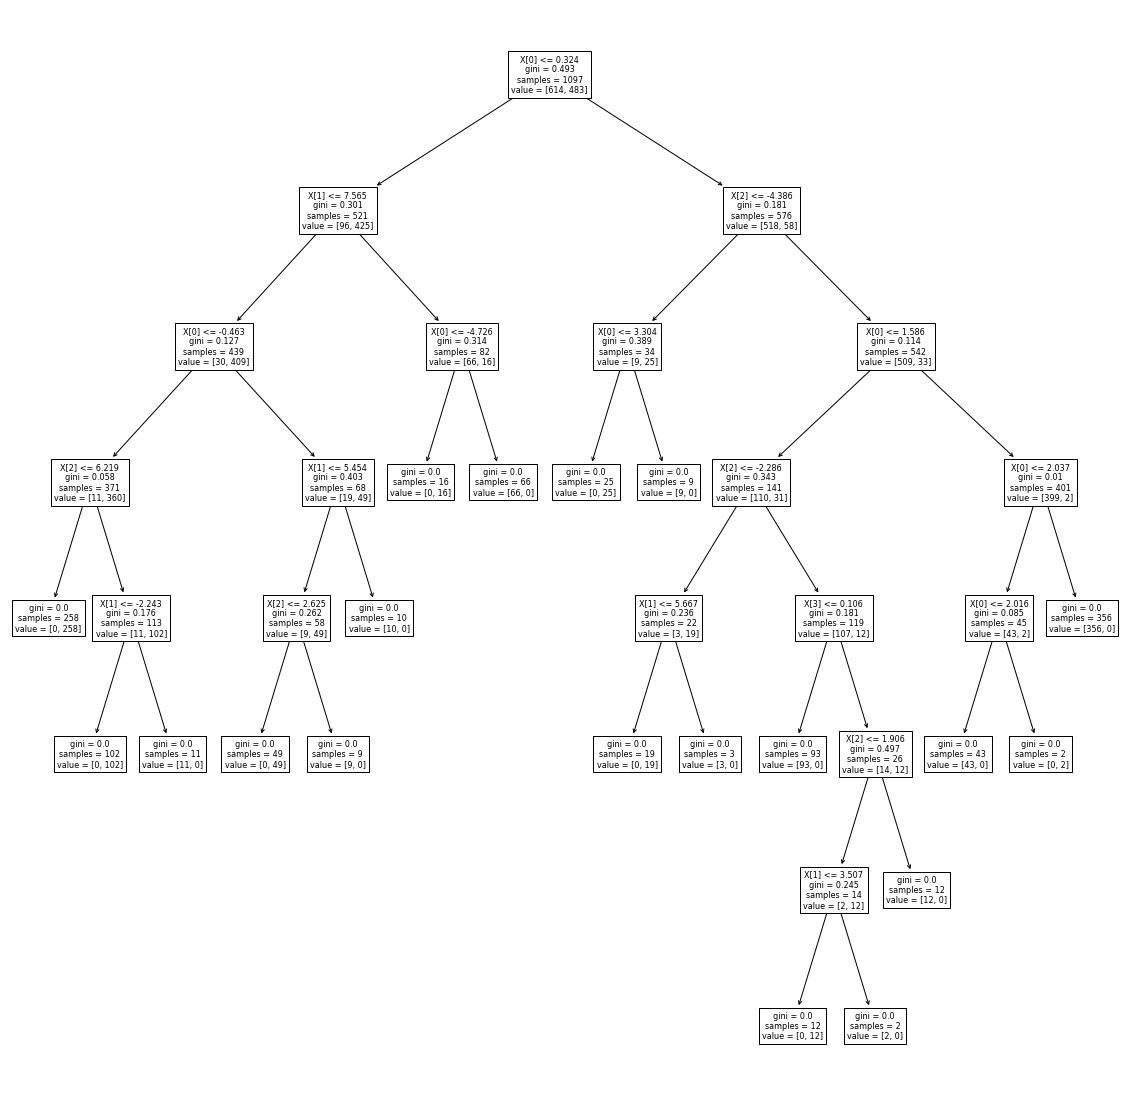

In [15]:
plt.subplots(figsize = (20,20))
tree.plot_tree(dec_gini)

[Text(597.8571428571429, 1019.25, 'X[0] <= 0.324\nentropy = 0.99\nsamples = 1097\nvalue = [614, 483]'),
 Text(345.42857142857144, 883.35, 'X[1] <= 5.865\nentropy = 0.689\nsamples = 521\nvalue = [96, 425]'),
 Text(159.42857142857144, 747.45, 'X[2] <= 3.064\nentropy = 0.28\nsamples = 413\nvalue = [20, 393]'),
 Text(106.28571428571429, 611.55, 'entropy = 0.0\nsamples = 247\nvalue = [0, 247]'),
 Text(212.57142857142858, 611.55, 'X[1] <= -1.82\nentropy = 0.531\nsamples = 166\nvalue = [20, 146]'),
 Text(106.28571428571429, 475.65, 'X[0] <= -0.394\nentropy = 0.059\nsamples = 145\nvalue = [1, 144]'),
 Text(53.142857142857146, 339.75, 'entropy = 0.0\nsamples = 144\nvalue = [0, 144]'),
 Text(159.42857142857144, 339.75, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(318.8571428571429, 475.65, 'X[2] <= 4.401\nentropy = 0.454\nsamples = 21\nvalue = [19, 2]'),
 Text(265.7142857142857, 339.75, 'X[2] <= 3.237\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(212.57142857142858, 203.85000000

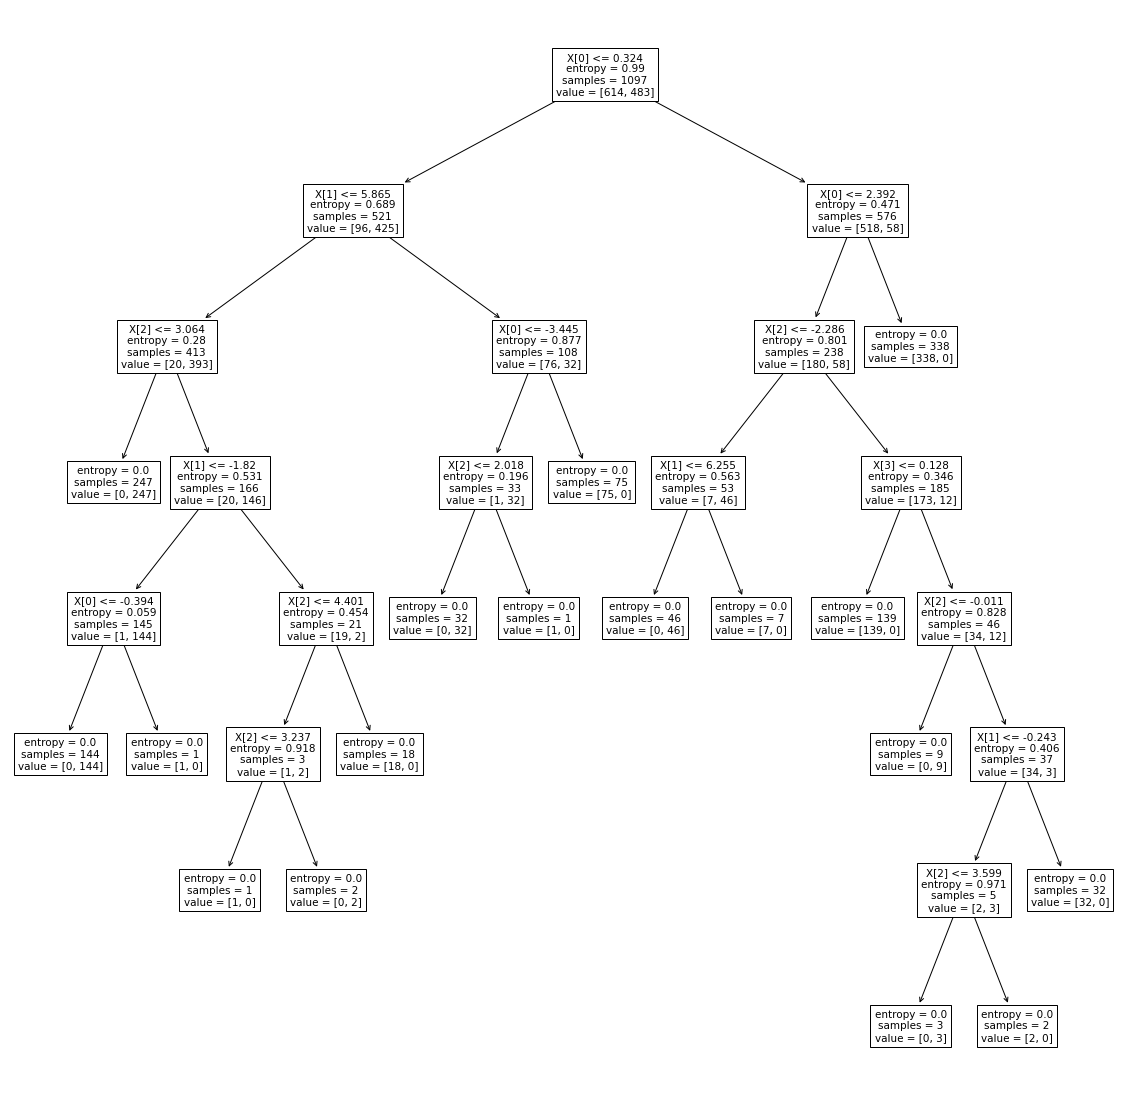

In [16]:
plt.subplots(figsize = (20,20))
tree.plot_tree(dec_ent)

# Random Forest

In [17]:
rand_gini = RandomForestClassifier(n_estimators = 15, criterion = 'gini')
rand_ent = RandomForestClassifier(n_estimators = 15, criterion = 'entropy')

rand_gini.fit(x_train, y_train)
rand_ent.fit(x_train, y_train)

print("Train Accuracy: ",rand_gini.score(x_train, y_train))
print("\nTest Accuracy: ",rand_gini.score(x_test, y_test))

print("\nTrain Accuracy: ",rand_ent.score(x_train, y_train))
print("\nTest Accuracy: ",rand_ent.score(x_test, y_test))

Train Accuracy:  1.0

Test Accuracy:  0.9963636363636363

Train Accuracy:  1.0

Test Accuracy:  0.9927272727272727


Overall all the model gave almost perfect accuracy, but the perfect one was from SVM model with rbf kernel and gamma value with 0.1 and KNN model with any n_neighbor.